In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

#  Funciones propias
from utils.EDA.eda_functions import plot_missing_values
from utils.EDA.eda_functions import plot_univariate_attribute
from utils.EDA.eda_functions import plot_duplicated_records
from utils.EDA.eda_functions import starting_descriptive_analysis


## **Carga de datos y Análisis exploratorio:**    

En esta primera sección, se realizará la carga de todos los conjuntos de datos, y un análisis exploratorio más exhaustivo para el conjunto de datos de entrenamiento. Dado que no se tiene certeza de que los datos de prueba correspondan a datos reales, que puedan ayudar a explicar el caso de estudio, estos sólo se tendrán en cuenta para la validación del modelo.

In [3]:
data_raw_train = pd.read_excel(r"variables_internas\train.xlsx")
data_raw_test = pd.read_excel(r"variables_internas\test.xlsx")

data_ipc = pd.read_excel(r"variables_externas\ipc.xlsx")
data_tasa_desempleo = pd.read_excel(r"variables_externas\tasa_desempleo.xlsx")
data_trm = pd.read_excel(r"variables_externas\trm.xlsx")

### **Datos de entrenamiento:**

In [4]:
data_raw_train.head()

,fecha,mes,año,trafico_dia,categoria,venta_diaria,area_total_ocupada
0,2019-01-01,1,2019,4481.0,COMIDAS Y BARES,3.487444e+07,721.903
1,2019-01-01,1,2019,4481.0,ENTRETENIMIENTO,4.204079e+06,1883.453
2,2019-01-01,1,2019,4481.0,HIPERMERCADO,2.318765e+07,6225.960
3,2019-01-01,1,2019,4481.0,HOGAR,3.491659e+04,104.078
4,2019-01-01,1,2019,4481.0,MODA Y CALZADO,9.370870e+06,2399.566


In [5]:
data_raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4343 entries, 0 to 4342
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fecha               4343 non-null   datetime64[ns]
 1   mes                 4343 non-null   int64         
 2   año                 4343 non-null   int64         
 3   trafico_dia         4343 non-null   float64       
 4   categoria           4343 non-null   object        
 5   venta_diaria        4343 non-null   float64       
 6   area_total_ocupada  4343 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 237.6+ KB


In [6]:
data_raw_train['mes'] = data_raw_train['mes'].astype(str)
data_raw_train['año'] = data_raw_train['año'].astype(str)

data_raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4343 entries, 0 to 4342
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fecha               4343 non-null   datetime64[ns]
 1   mes                 4343 non-null   object        
 2   año                 4343 non-null   object        
 3   trafico_dia         4343 non-null   float64       
 4   categoria           4343 non-null   object        
 5   venta_diaria        4343 non-null   float64       
 6   area_total_ocupada  4343 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 237.6+ KB


In [7]:
profile_raw = ProfileReport(
    data_raw_train,
    title = "Perfil datos de entrenamiento (Training)",
    infer_dtypes = False
)
profile_raw.to_file("Pefil datos de entrenamiento - train.html")
profile_raw

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### **Observaciones:**

Teniendo en cuenta los datos entregados en el conjunto "train", al hacer una análisis descriptivo preliminar, vale la pena resaltar lo siguiente:    
* El conjunto de datos está compuesto por 7 variables, y 4343 registros, que comprende datos en un perior de tiempo desde el 01/01/2019 hasta el 28/02/2021
* En el conjunto de entrenamiento no se evidencian valores **faltantes** ni registros **duplicados**
----
##### Análisis por cada variable numérica o categórica:
* Variable **trafico_dia**:
  * No presenta valores extremos elevados, lo cual se puede soportar en que la curtosis de los datos es negativa
  * No se presentan valores por fuera del dominio de la variable
  * La media y la mediana son valores cercanos, dando una primer impresión de baja dispersión en los registros
  * De tener en cuenta que si bien, a partir de los estadísticos principales se denota consistencia en los datos, según el histograma, se podría presentar un comportamiento bimodal. Para esto, es importante analizar la posible correlación existente con respecto a otras variables
* Variable **categoria**:
  * Existen 8 clases para esta variable, dónde las predominantes son COMIDAS Y BARES, ENTRETENIMIENTO, HIPERMERCADO, MODA Y CALZADO, y HOGAR, pues en estas se concentra el 88,8% de los datos. En caso de no existir influencia de esta variable en las demás, se optaría por agrupar las 3 clases restantes en una única, con el fin de contar con un dataset balanceado
* Variable **venta_diaria**:
  * Los datos son altamente dispersos, específicamente asimétricos hacia la derecha. Adicionalmente, el 75% de los datos está por debajo de 43 millones, mientras que el valor máximo es de 286 millones. En esta caso puntual será importante comprender las causas puntuales de los valores extremos.
  * Importante anotar que el 5% de los datos es menor a 1367, valor muy por debajo inclusive del Q1 que es del orden de 1 millón. 
* Variable **area_total_ocupada**:
  * Está variable para ser numérica, está exponiendo un comportamiento discreto, según el histograma observado. Es decir, existen valores iguales que tienen alta repetición. *Una primer hipotesis es que correspondan a registros de la misma tienda.*
  * Los datos presentan una dispersión alta, teniendo en cuenta la diferencia entre la mediana y la media, y la magnitud de la desviación estándar.
  * Sin embargo, aunque la dispersión es posiblemente alta, para la distribución de estos, no es tan evidente que deban ser considerados como valores atípicos o extremos, teniendo en cuenta el valor negativo de la kurtosis

----
##### Correlación entre variables:
Por ahora, sólo se analizan las variables numéricas para evaluar la correlación entre sí. Partiendo de la correlación de Spearman, recomendada cuando alguna de los atributos cuenta con valores extremos, en este caso "venta_diaria", es posible acotar lo siguiente:
* La variable venta diaria tiene una alta correlación con la variable area_total_ocupada, lo cuál es de entenderse en primera instancia, pues a mayor presencia de personas, es mucho más probable que se presente un consumo mayor.
* También se presenta una correlación, aunque no tan alta, de la variable venta_diaria con la variable tráfico. En este caso, no se le dará alta importancia a esta como explicativa de la venta diaria, dado que el tráfico no estaría directamente relacionado con presencia en los centros comerciales, pues son muchos más los factores que pueden alterar esto, como lo son las condiciones meteorológicas, por citar uno.


##### Análisis en función del tiempo:

In [14]:
data_raw_train['semana'] = data_raw_train['fecha'].dt.to_period('W')

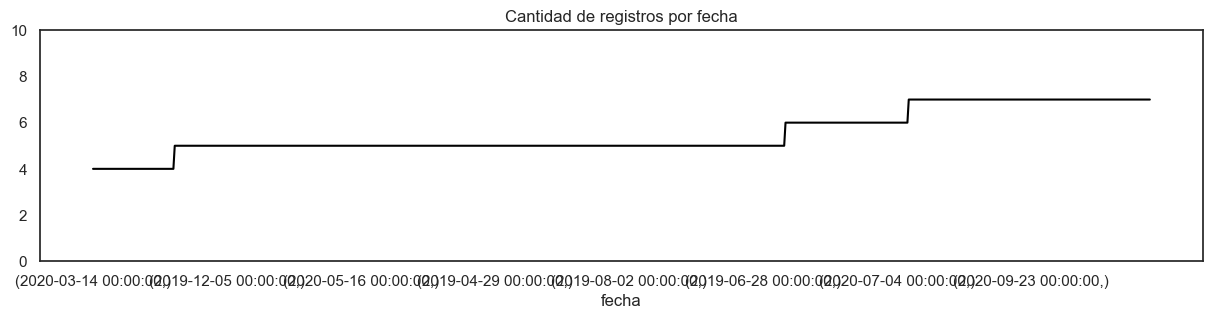

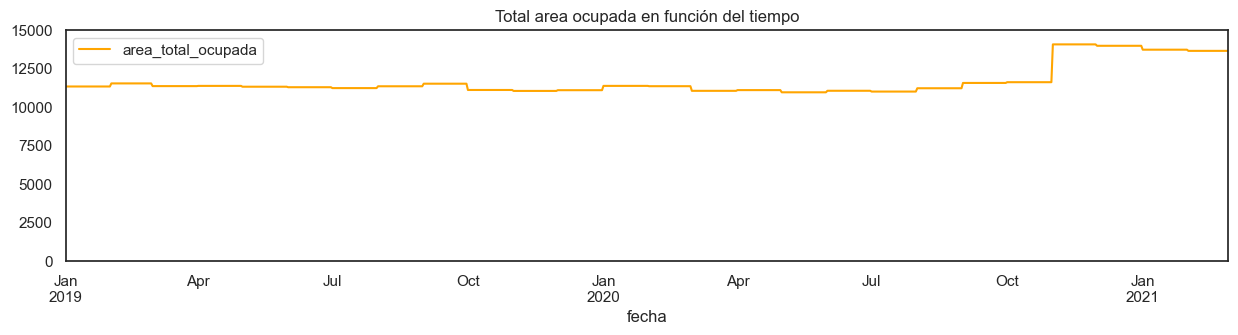

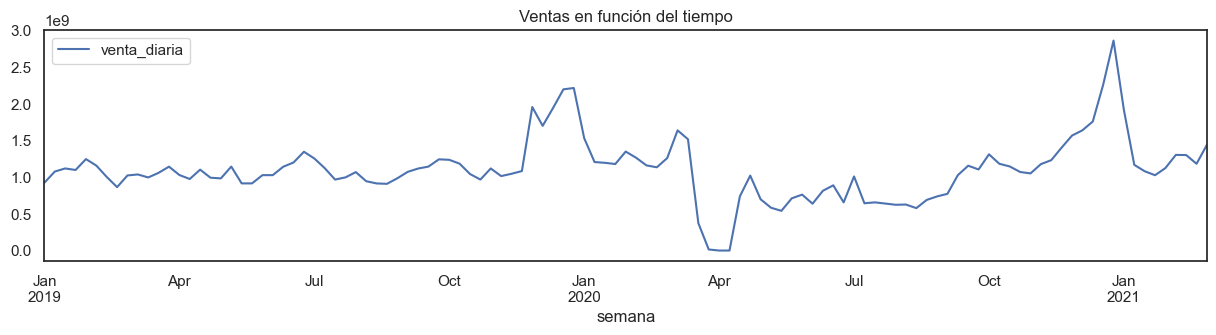

In [16]:
(
    data_raw_train[['fecha']].value_counts(ascending = True)
    .plot(
        figsize = (15, 3),
        color = 'black',
        ylim = (0, 10)
    )
)
plt.title('Cantidad de registros por fecha')
plt.show()

(
    data_raw_train[['fecha', 'area_total_ocupada']]
    .groupby('fecha').sum()
    .plot(
        figsize = (15, 3),
        color = 'orange',
        ylim = (0, 15000)
    )
)
plt.title('Total area ocupada en función del tiempo')
plt.show()

(
    data_raw_train[['semana', 'venta_diaria']]
    .groupby('semana').sum()
    .plot(
        figsize = (15, 3),
    )
)
plt.title('Ventas en función del tiempo')
plt.show()


**Observaciones:**    
* Es posible inferir por el comportamiento de la cantidad de registros presentados en función del tiempo, que cada uno de estos hace alusión a un sitio o centro comercial, por lo que a partir noviembre de 2021 se abrieron o colocaron en operación dos sitios más. Esto se respalda con el incremento en la cantidad de area ocupada en ese mismo periodo de tiempo.
* Entre finales de marzo y abril de 2020, se nota una disminución importante de la cantidad de ventas, claramente explicable por el confinamiento asociado a la pandemia del covid-19

##### Análisis en función de las variable variable categórica:

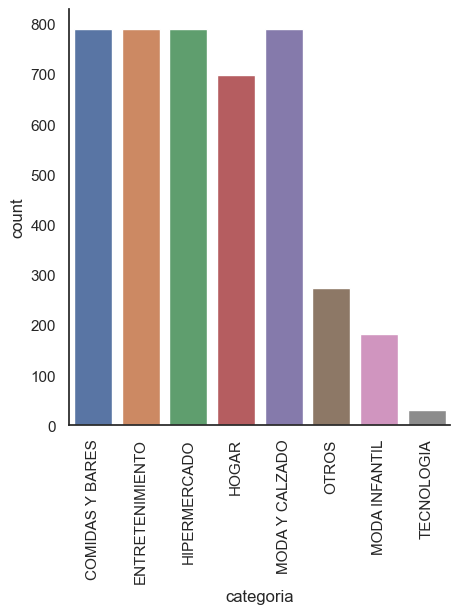

In [65]:
sns.catplot(
    data = data_raw_train,
    x = 'categoria',
    kind = 'count'
)
plt.xticks(rotation = 'vertical')
plt.show()

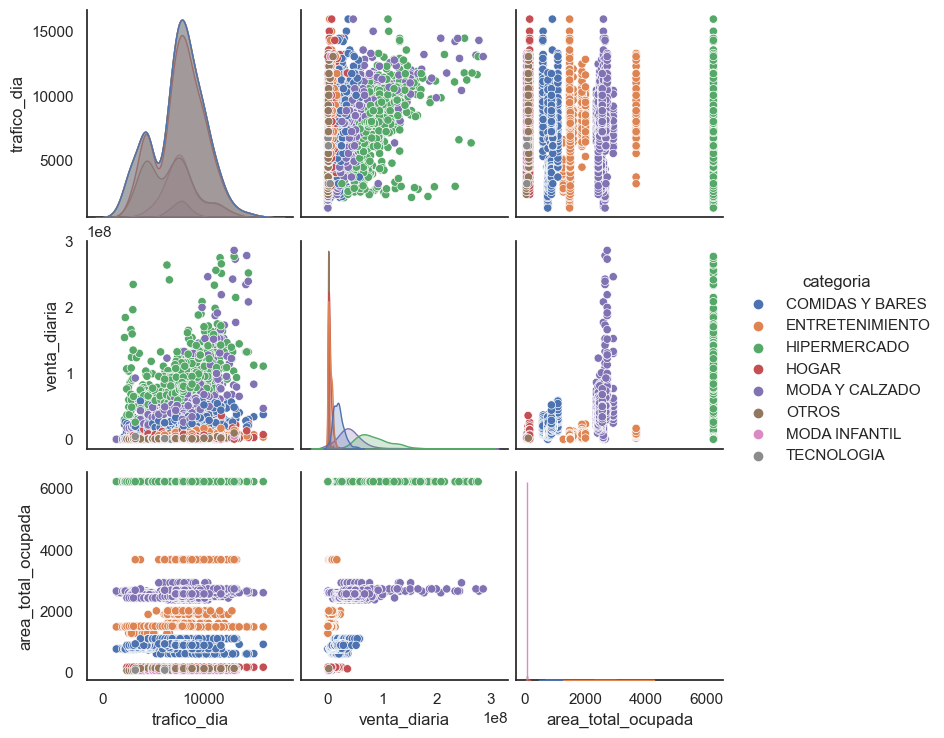

In [66]:
sns.pairplot(
    data = data_raw_train,
    hue = 'categoria'
)
plt.show()

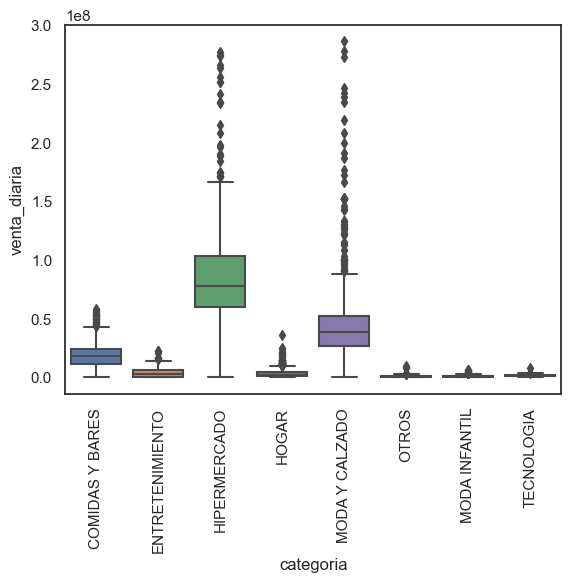

In [67]:
sns.boxplot(
    data = data_raw_train,
    x = 'categoria',
    y = 'venta_diaria'
)
plt.xticks(rotation = 'vertical')
plt.show()

##### Observaciones: 

* Efectivamente, la variable "categoría" muestra una influencia significativa en la cantidad de ventas según el tipo de comercio. Claramente los hipermercados presentan valores superlativos en comparación con las demás clases.
* También se nota como el área total ocupada es prácticamente estática en función de la categoría, lo que daría a entender que la relación es completamente directa entre el tipo de comercio y el área.

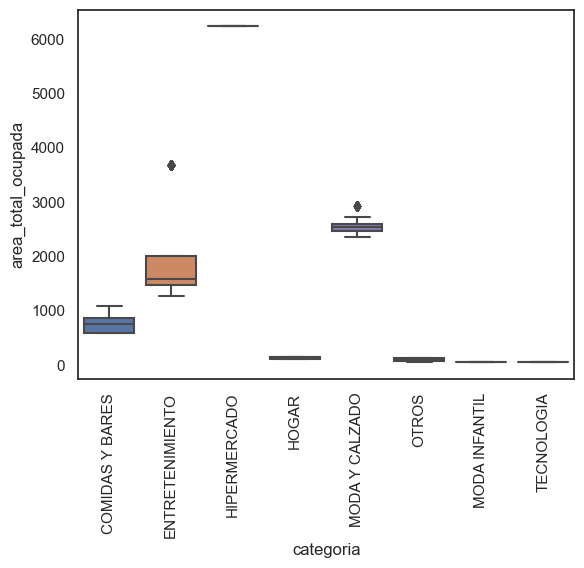

In [68]:
sns.boxplot(
    data = data_raw_train,
    x = 'categoria',
    y = 'area_total_ocupada'
)
plt.xticks(rotation = 'vertical')
plt.show()

### **Demás conjuntos de datos:**

#### Datos de prueba:

In [69]:
print(data_raw_test.info())
data_raw_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fecha               217 non-null    datetime64[ns]
 1   mes                 217 non-null    int64         
 2   año                 217 non-null    int64         
 3   trafico_dia         217 non-null    float64       
 4   categoria           217 non-null    object        
 5   venta_diaria        217 non-null    float64       
 6   area_total_ocupada  217 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 12.0+ KB
None


,fecha,mes,año,trafico_dia,categoria,venta_diaria,area_total_ocupada
0,2021-03-01,3,2021,9288.0,COMIDAS Y BARES,2.643084e+07,855.959
1,2021-03-01,3,2021,9288.0,ENTRETENIMIENTO,6.239684e+06,3673.280
2,2021-03-01,3,2021,9288.0,HIPERMERCADO,7.603325e+07,6225.960
3,2021-03-01,3,2021,9288.0,HOGAR,4.065506e+06,156.104
4,2021-03-01,3,2021,9288.0,MODA INFANTIL,3.457792e+05,53.781


Al validar, cuenta con los mismos atributos del conjunto de entrenamiento. El cuidado a tener en cuenta es de realizar las mismas transformaciones que se hagan al primer conjunto, con este.

#### Datos del IPC:

In [70]:
print(data_ipc.info())
data_ipc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7291 entries, 0 to 7290
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Mes                      7291 non-null   object        
 1   Año                      7291 non-null   int64         
 2   Año(aaaa)-Mes(mm)        7291 non-null   object        
 3   Fecha (DD/MM/AAAA)       7291 non-null   object        
 4   Ciudad                   7291 non-null   object        
 5   Orden                    7291 non-null   int64         
 6   IPC                      7291 non-null   float64       
 7   Variación anual %        7037 non-null   float64       
 8   Variación año corrido %  7290 non-null   float64       
 9   Variación mensual %      7290 non-null   float64       
 10  Nivel Id                 7291 non-null   int64         
 11  Gasto Id                 7291 non-null   int64         
 12  Año mes                  7291 non-

,Mes,Año,Año(aaaa)-Mes(mm),Fecha (DD/MM/AAAA),Ciudad,Orden,IPC,Variación anual %,Variación año corrido %,Variación mensual %,Nivel Id,Gasto Id,Año mes,fecha,año,mes
0,Abril,1979,1979-04-30,1979-04-30,"Bogotá, D.C.",1,0.58,NaN,12.4,1.90,9,0,197904,1979-04-30,1979,4
1,Agosto,1979,1979-08-31,1979-08-31,"Bogotá, D.C.",1,0.62,NaN,19.6,1.53,9,0,197908,1979-08-31,1979,8
2,Diciembre,1979,1979-12-31,1979-12-31,"Bogotá, D.C.",1,0.67,29.7,29.7,1.97,9,0,197912,1979-12-31,1979,12
3,Enero,1979,1979-01-31,1979-01-31,"Bogotá, D.C.",1,0.54,NaN,3.7,3.70,9,0,197901,1979-01-31,1979,1
4,Febrero,1979,1979-02-28,1979-02-28,"Bogotá, D.C.",1,0.55,NaN,5.7,1.93,9,0,197902,1979-02-28,1979,2


#### Datos de la tasa de desempleo:

In [71]:
print(data_tasa_desempleo.info())
data_tasa_desempleo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Año(aaaa)-Mes(mm)         246 non-null    object        
 1   Mes nombre español        246 non-null    object        
 2   Id agrupacion             246 non-null    int64         
 3   Tasa empleo               246 non-null    float64       
 4   Tasa desempleo            246 non-null    float64       
 5   Fecha cargue maxima       246 non-null    int64         
 6   Version                   246 non-null    object        
 7   Codigo metodologia        246 non-null    int64         
 8   'Metodología: '           246 non-null    object        
 9   Descripcion  metodologia  246 non-null    object        
 10  fecha                     246 non-null    datetime64[ns]
 11  año                       246 non-null    int64         
 12  mes                   

,Año(aaaa)-Mes(mm),Mes nombre español,Id agrupacion,Tasa empleo,Tasa desempleo,Fecha cargue maxima,Version,Codigo metodologia,'Metodología: ',Descripcion metodologia,fecha,año,mes
0,2021-06,Junio,3,51.142472,14.401528,2021062021073023,Ultima,2,Metodología:,Proyecciones calculadas en 2012,2021-06-01,2021,6
1,2021-05,Mayo,3,50.797091,15.632188,2021052021063023,Ultima,2,Metodología:,Proyecciones calculadas en 2012,2021-05-01,2021,5
2,2021-04,Abril,3,50.844356,15.052796,2021042021053123,Ultima,2,Metodología:,Proyecciones calculadas en 2012,2021-04-01,2021,4
3,2021-03,Marzo,3,51.733218,14.180513,2021032021043023,Ultima,2,Metodología:,Proyecciones calculadas en 2012,2021-03-01,2021,3
4,2021-02,Febrero,3,51.827471,15.885255,2021022021033123,Ultima,2,Metodología:,Proyecciones calculadas en 2012,2021-02-01,2021,2


#### Datos de la TRM:

In [72]:
print(data_trm.info())
data_trm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10844 entries, 0 to 10843
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   fecha   10844 non-null  datetime64[ns]
 1   trm     10844 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 169.6 KB
None


,fecha,trm
0,1991-11-27,693.32
1,1991-11-28,693.99
2,1991-11-29,694.70
3,1991-11-30,694.70
4,1991-12-01,643.42


## **Análisis predictivo:**    

En esta ocasión se evaluarán dos familias de modelos diferentes: Las ventas por si solas, como una serie de tiempo, y un modelo regresor de machine learning.

### **Series de tiempo:**

In [23]:
signal_ventas = data_raw_train.groupby('fecha').sum()['venta_diaria']
signal_ventas.head()

fecha
2019-01-01    7.167195e+07
2019-01-02    1.630826e+08
2019-01-03    1.623873e+08
2019-01-04    1.754366e+08
2019-01-05    1.954000e+08
Name: venta_diaria, dtype: float64

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [25]:
def evaluate_arima_model(X, arima_order):

    train_size = int(len(X) * 0.80)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]

    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.get_forecast().predicted_mean
        predictions.append(yhat)
        history.append(test[t])

    rmse = np.sqrt(mean_squared_error(test, predictions))
    return rmse
 
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE = %.3f' % (best_cfg, best_score))
    return best_cfg

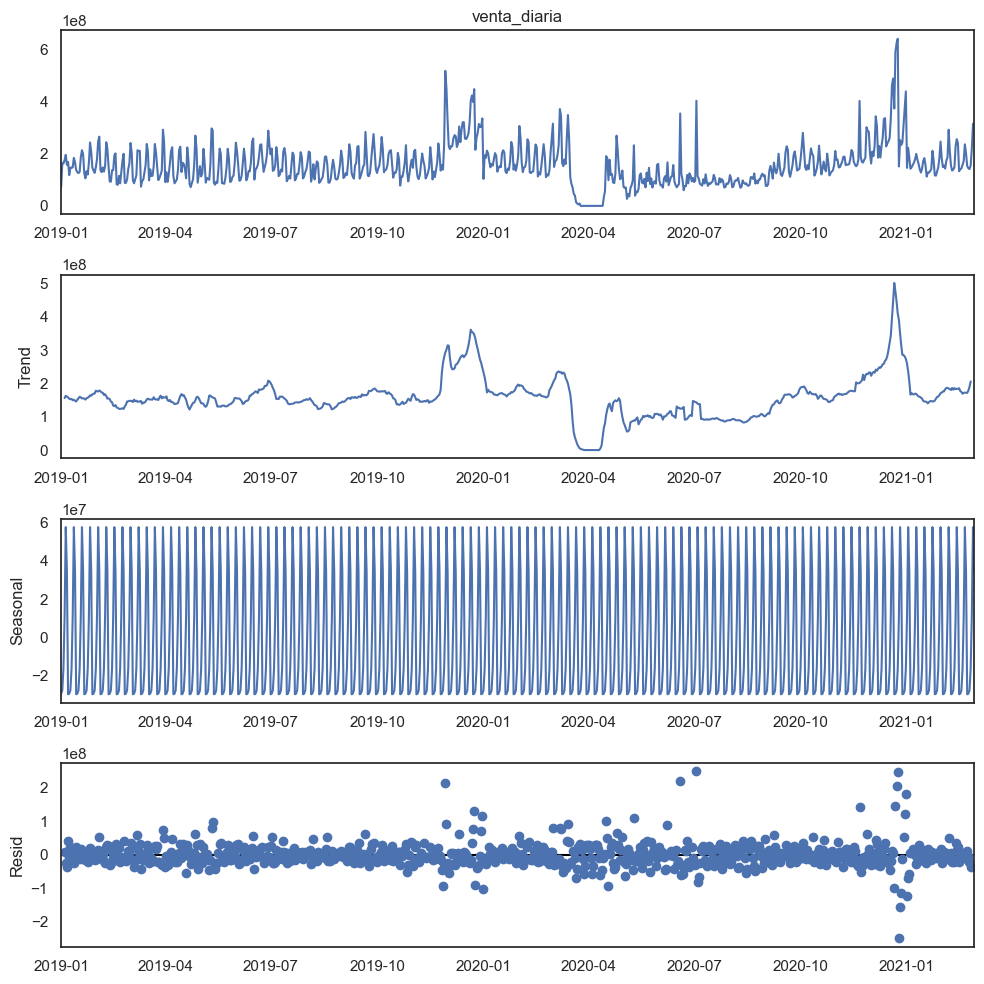

In [26]:
result = seasonal_decompose(signal_ventas, model = 'additive')

plt.rc("figure", figsize = (10, 10))
result.plot()
plt.show()

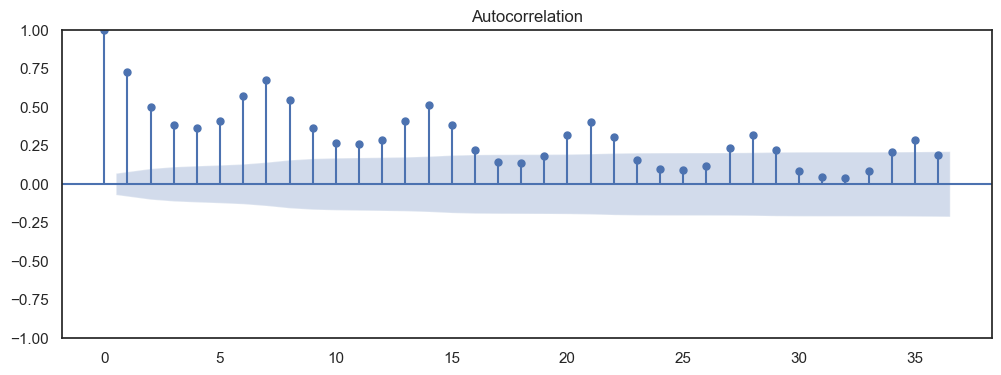

In [27]:
plt.rc("figure", figsize = (12, 4))
plot_acf(signal_ventas, lags = 36)
plt.show()

c:\ProgramData\Miniconda3\envs\data_science_master\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


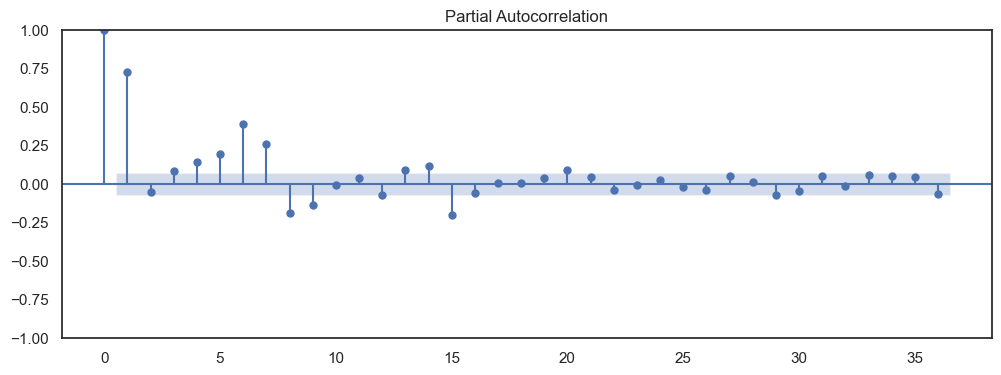

In [28]:
plt.rc("figure", figsize = (12, 4))
plot_pacf(signal_ventas, lags = 36)
plt.show()

In [29]:
model = ARIMA(signal_ventas, order = (6, 1, 1))
model_fit = model.fit()

c:\ProgramData\Miniconda3\envs\data_science_master\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\Miniconda3\envs\data_science_master\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\Miniconda3\envs\data_science_master\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


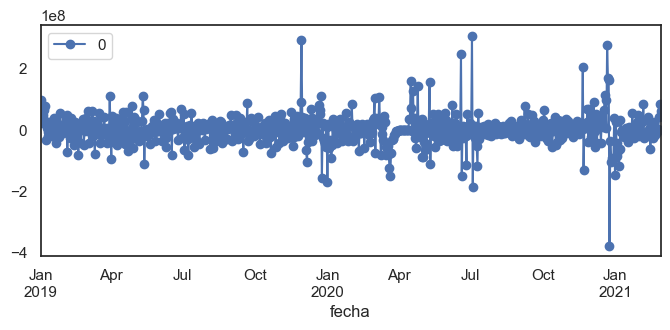

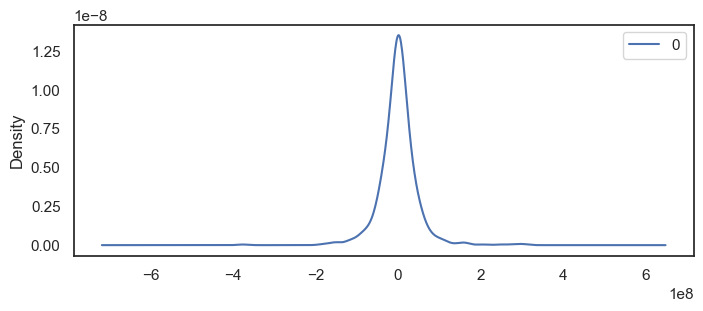

In [30]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize = (8, 3), marker = 'o')
plt.show()

residuals.plot(figsize = (8, 3), kind = 'kde')
plt.show()

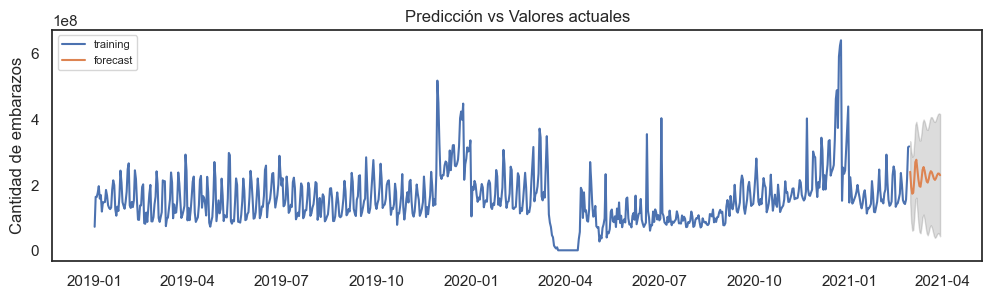

In [31]:
forecast = model_fit.get_forecast(steps = 30, alpha=0.05)

fc = forecast.predicted_mean
conf = forecast.conf_int(alpha=0.05)

fc_series = pd.Series(fc)
lower_series = pd.Series(conf.iloc[:, 0])
upper_series = pd.Series(conf.iloc[:, 1])

plt.figure(figsize=(12,3), dpi=100)
plt.plot(signal_ventas, label='training')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Predicción vs Valores actuales')
plt.ylabel('Ventas diarias')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [33]:
rmse = evaluate_arima_model(signal_ventas, arima_order = (6, 1, 1))

print(f'RMSE de este modelo arima: {rmse}')

RMSE de este modelo arima: 61637675.11325661


### **Regresiones Machine Learning:**

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [39]:
X = data_raw_train[['trafico_dia', 'area_total_ocupada']]
y = data_raw_train['venta_diaria'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3474, 2), (869, 2), (3474,), (869,))

#### Regresión Lineal simple:

In [40]:
lm = LinearRegression()
lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R2 Score: %.2f" % r2_score(y_test, y_test_pred))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_pred))

Root mean squared error: 23043918.58
R2 Score: 0.62
Mean absolute error: 14543178.90


#### Árbol de decisiones

In [41]:
decision_tree = DecisionTreeRegressor(max_depth = 5, random_state = 42)
decision_tree.fit(X_train, y_train)

y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R2 Score: %.2f" % r2_score(y_test, y_test_pred))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_pred))

Root mean squared error: 18415645.44
R2 Score: 0.76
Mean absolute error: 9324568.16


Usando el data set de prueba para la validación del actual modelo:

In [43]:
X_val = data_raw_test[['trafico_dia', 'area_total_ocupada']]
y_val = data_raw_test['venta_diaria'].values
y_val_pred = decision_tree.predict(X_val)

print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_val, y_val_pred)))
print("R2 Score: %.2f" % r2_score(y_val, y_val_pred))
print("Mean absolute error: %.2f" % mean_absolute_error(y_val, y_val_pred))

Root mean squared error: 19633907.84
R2 Score: 0.65
Mean absolute error: 10802407.15
